# Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Colab use
#from google.colab import files
#uploaded = files.upload()
#import io

In [2]:
sensor_names = ['SensorMeasure{}'.format(i) for i in range(1,22)] 

#get single train_set
raw_data = pd.read_csv("../Data/RUL_Train_001.csv")

#Colab use
#raw_data = pd.read_csv(io.BytesIO(uploaded['RUL_Train_001.csv']))

y = raw_data['RUL']
raw_data = raw_data.drop(['RUL'], 1)
x = raw_data[sensor_names]

# PCA

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on x
scaler.fit(x)

# Apply transform to x
x = scaler.transform(x)

In [4]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95, random_state = 1) #95% of the variance (information) is retained

pca.fit(x)

x = pca.transform(x)

Text(0, 0.5, 'Eigenvalue')

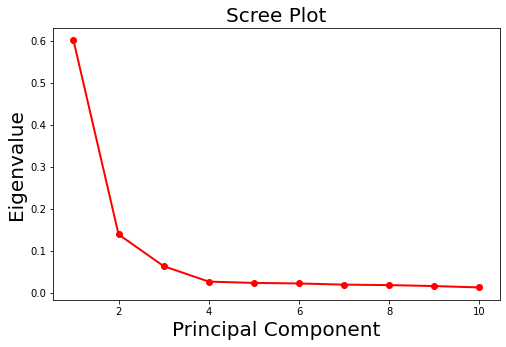

In [5]:
fir = plt.figure(figsize=(8,5))
sing_vals = np.arange(len(pca.components_)) + 1
plt.plot(sing_vals, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot', fontsize = 20)
plt.xlabel('Principal Component', fontsize = 20)
plt.ylabel('Eigenvalue', fontsize = 20)

In [6]:
principalDf = pd.DataFrame(data = x)
RULDF = pd.DataFrame(data = y)

In [7]:
finalDf = pd.concat([principalDf, RULDF], axis = 1)
finalDf.columns = [*finalDf.columns[:-1], 'RUL']

finalDf

,0,1,2,3,4,5,6,7,8,9,RUL
0,-2.944902,-0.452747,-0.300691,0.824244,0.629020,-0.344302,0.032812,0.635351,0.253381,0.233350,191
1,-2.360407,-0.795862,-0.248736,0.961509,0.285420,-0.022143,-0.303058,0.648289,0.061385,-0.221041,190
2,-2.979360,-0.549591,-0.290127,0.603968,-1.100258,-0.457617,0.230811,0.106652,-0.148599,0.275155,189
3,-3.384948,-0.841757,-0.305124,-0.404573,-0.052269,0.126706,-0.112252,-1.127880,0.329523,0.693301,188
4,-2.422708,-0.377598,-0.289617,-0.716113,0.360137,0.072907,-0.494492,0.223097,-0.166639,0.088924,187
...,...,...,...,...,...,...,...,...,...,...,...
20626,6.871941,-0.925121,0.329168,-0.589507,0.607422,-0.047239,0.908671,-0.700249,-0.088798,-0.202458,4
20627,7.019167,-1.012647,0.350161,0.651775,-0.436064,-0.562278,-1.106574,-0.204556,0.303895,-0.612581,3
20628,7.999870,-0.725111,0.385854,-0.253698,1.171454,-0.334683,0.771711,0.336670,-1.303329,-0.693867,2
20629,7.741249,-0.771858,0.371672,0.716008,-0.203098,-1.400807,-0.426351,0.073903,-0.111777,-0.887734,1


# Test Data

In [8]:
#get single train_set
raw_data = pd.read_csv("../Data/test_FD001.txt", sep=' ', header = None)

#Colab use
#raw_data = pd.read_csv(io.BytesIO(uploaded['test_FD001.txt']), sep=' ', header = None)

if len(raw_data.columns) > 26:
    x = raw_data.drop([0, 1, 2, 3, 4, 26 ,27], axis='columns')

x

,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [9]:
# Apply transform to x
x = scaler.transform(x)

Text(0, 0.5, 'Eigenvalue')

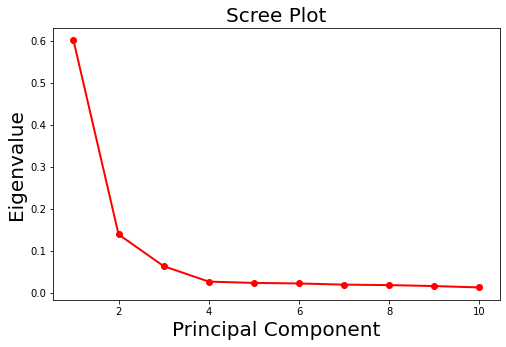

In [10]:
x = pca.transform(x)

principalDf = pd.DataFrame(data = x)

principalDf

fir = plt.figure(figsize=(8,5))
sing_vals = np.arange(len(pca.components_)) + 1
plt.plot(sing_vals, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot', fontsize = 20)
plt.xlabel('Principal Component', fontsize = 20)
plt.ylabel('Eigenvalue', fontsize = 20)